In [1]:
import zipfile

In [2]:
import os
os.getcwd()

'/home/uc4f45b9aa89ab4b05dfd3ea89fd4f5c/veg img dataset'

In [3]:
with zipfile.ZipFile('Train.zip','r')as zip_ref:
    zip_ref.extractall()

In [8]:
pip install --upgrade intel-extension-for-tensorflow[cpu]

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 3.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
#enable onednn
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1' 
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'

In [1]:
#intel lib

import intel_extension_for_tensorflow as itex


2024-04-02 21:25:59.029767: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 21:25:59.032230: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 21:25:59.060951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 21:25:59.060968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 21:25:59.062228: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')  # Adjust the output size according to your dataset
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
--------------------------------------------------------------------------------------------------------------------------

In [ ]:
#dataset uploading

In [4]:
train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 10160 images belonging to 46 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory(
    'Validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 1549 images belonging to 46 classes.


In [ ]:
--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Train the model

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/80
317/317 [==============================] - 58s 183ms/step - loss: 2.4853 - accuracy: 0.3024 - val_loss: 2.6503 - val_accuracy: 0.2975
Epoch 2/80
317/317 [==============================] - 58s 183ms/step - loss: 2.1774 - accuracy: 0.3800 - val_loss: 2.4762 - val_accuracy: 0.3613
Epoch 3/80
317/317 [==============================] - 56s 177ms/step - loss: 1.9946 - accuracy: 0.4265 - val_loss: 2.4624 - val_accuracy: 0.3613
Epoch 4/80
317/317 [==============================] - 57s 180ms/step - loss: 1.8599 - accuracy: 0.4608 - val_loss: 2.3392 - val_accuracy: 0.3867
Epoch 5/80
317/317 [==============================] - 55s 174ms/step - loss: 1.7549 - accuracy: 0.4831 - val_loss: 2.1701 - val_accuracy: 0.4310
Epoch 6/80
317/317 [==============================] - 57s 179ms/step - loss: 1.6858 - accuracy: 0.5014 - val_loss: 2.1188 - val_accuracy: 0.4564
Epoch 7/80
317/317 [==============================] - 56s 178ms/step - loss: 1.6137 - accuracy: 0.5252 - val_loss: 2.0997 - val_ac

In [8]:
# Save the model to Google Drive
model.save('model80intel1api.h5')

# Save the model to Google Drive
model.save('my_model80intel1api.keras')

/home/uc4f45b9aa89ab4b05dfd3ea89fd4f5c/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history80intel1api.csv', index=False)


In [ ]:
-----------------------------------------------------------------------------------------------------------------------

In [ ]:
#find accuracy

In [10]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print('Training accuracy:', train_acc)

318/318 [==============================] - 60s 190ms/step - loss: 0.3793 - accuracy: 0.8731
Training accuracy: 0.8731299042701721


In [11]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)

49/49 [==============================] - 8s 160ms/step - loss: 2.0178 - accuracy: 0.7573
Validation accuracy: 0.7572627663612366


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [ ]:
#testing (test dataset)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set to False to keep the order of predictions
)


Found 1549 images belonging to 46 classes.


In [13]:
# Evaluate the model on the test data
results = model.evaluate(test_generator)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

49/49 [==============================] - 4s 88ms/step - loss: 2.0178 - accuracy: 0.7573
Test Loss: 2.0178000926971436
Test Accuracy: 0.7572627663612366


In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [ ]:
#example prediction

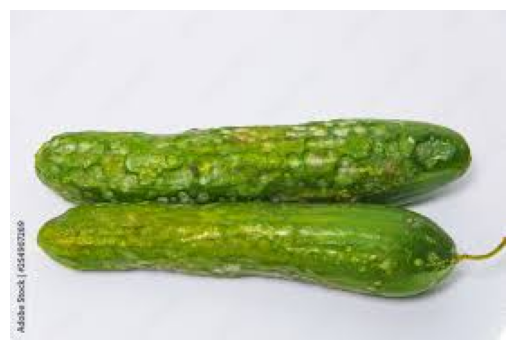

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Provide the file path of the uploaded image
image_path = 'images.jpg'  # Replace 'path_to_your_uploaded_image.jpg' with your file path

# Read the uploaded image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the image you want to predict
img_path = 'images.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize


# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 38ms/step
Predicted Class: 20


In [23]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1549 files belonging to 46 classes.


In [24]:
print("It's a {}".format(test_set.class_names[predicted_class]))

It's a Rotten Cucumber
